<AxesSubplot:>

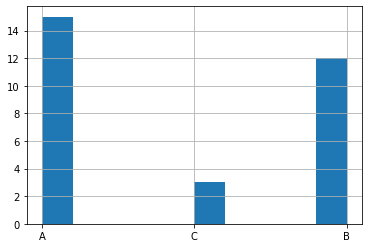

In [4]:
import pandas as pd
brand = pd.read_csv('brand.csv')
customer = pd.read_csv('customer.csv')
sales = pd.read_csv('sales.csv')
brand['buy'].hist()

<AxesSubplot:>

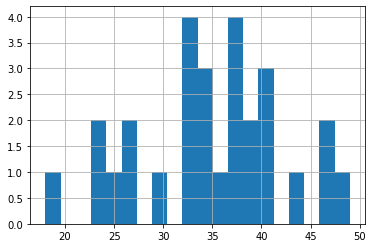

In [6]:
sales['units'].hist( bins=20 ) 

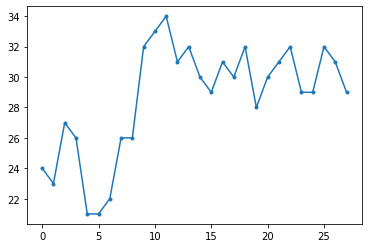

In [7]:
import matplotlib.pyplot as plt
plt.plot( sales['temp'], '.-' ) 

In [8]:
import numpy as np
np.sum(sales['units'])

975

In [9]:
np.size(sales['units'])

28

In [10]:
np.sum( sales['units'] ) / np.size( sales['units'] )

34.82142857142857

In [18]:
print(np.mean(sales['units']))
print(np.median(sales['units']))

34.82142857142857
35.5


In [21]:
x = sales['units'] # 分析データを「変数x」に代入
np.sum( (x - np.mean(x))**2 ) / np.size(x) 

56.28954081632654

In [22]:
np.sum( (x - np.mean(x))**2 ) / (np.size(x)-1)

58.374338624338634

In [28]:
print(np.var(x))
print(np.var(x, ddof = 1))
print(np.std(x))
print(np.std(x, ddof = 1))
print(np.var(x)**0.5 )
print(np.sqrt( np.var(x, ddof=1) ))

56.28954081632654
58.374338624338634
7.502635591332325
7.640310113100033
7.502635591332325
7.640310113100033


Text(0, 0.5, 'units')

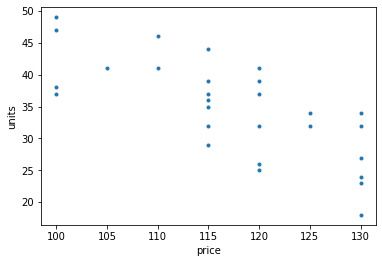

In [29]:
plt.plot( sales['price'], sales['units'], '.' ) # 価格と売上数量の相関図
plt.xlabel( 'price' )
plt.ylabel( 'units' )

Text(0, 0.5, 'units')

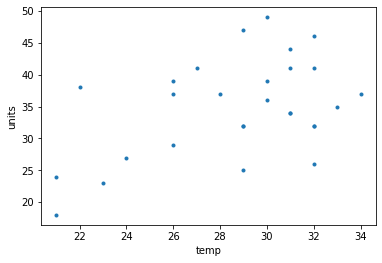

In [30]:
plt.plot( sales['temp'], sales['units'], '.' ) # 最高気温と売上数量の相関図
plt.xlabel( 'temp' )
plt.ylabel( 'units' )

In [32]:
x = sales['price'] # 価格データ
X = ( x-np.mean(x) ) / np.sqrt( np.var(x, ddof=1) )
print(np.mean(X))
print(np.var(X, ddof = 1))

4.282288809268461e-16
1.0000000000000002


In [37]:
y = sales['units'] # 売上数量データ
Y = ( y-np.mean(y) ) / np.sqrt( np.var(y, ddof=1) ) 
print(np.mean(Y))
print(np.var(Y, ddof = 1))

2.498001805406602e-16
0.9999999999999998


In [38]:
np.sum( (x-np.mean(x)) * (y-np.mean(y)) ) / (np.size(x)-1)

-54.417989417989425

In [39]:
np.cov(x, y)[0, 1]

-54.41798941798941

In [40]:
np.cov( X, Y )[0,1] 

-0.7228436548281524

In [41]:
np.corrcoef( x, y )[0,1]

-0.7228436548281519

In [42]:
x = sales['temp']
y = sales['units'] # 最高気温x, 売上数量y
np.corrcoef( x, y )[0,1] 

0.47103586348085474

In [43]:
customer.head() 

,ID,gender,age,freq,DM
0,1,0,36,2,0
1,2,1,31,5,1
2,3,0,34,1,0
3,4,1,26,4,1
4,5,0,28,3,0


In [44]:
pd.crosstab( customer['gender'], customer['DM'] ) 

DM,0,1
gender,,
0,9,1
1,3,7


In [45]:
np.corrcoef( customer['gender'], customer['DM'] )[0,1] 

0.6123724356957945

katamuki= 66.93577531067254
seppenn= -246.17544659173993


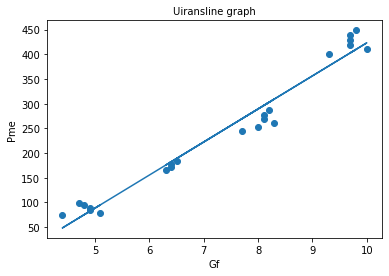

In [2]:
#線形近似した、y = ax+b のグラフを出力する。
#傾き、aと切片bを求めるプログラム
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
x = [7.7, 8.0, 8.3, 8.1, 8.1, 8.2]+[6.3, 6.4, 6.4, 6.5]+[9.3, 10, 9.7, 9.7, 9.7, 9.8]+[4.4, 5.1, 4.9, 4.9, 4.8, 4.7]
y = [245.5, 253.5, 261.8, 269.9, 278, 286.2]+[165.4, 171.8, 178.2, 184.7]+[399.8, 409.8, 419.5, 429.2, 438.9, 448.7]+[74.3, 79.4, 84.3, 89.2, 94, 98.7]
########線形近似のグラフを求める########
senkei = np.polyfit(x, y, 1)
func = np.poly1d(senkei)
a, b = np.polyfit(x, y, 1)
y2 = func(x)
plt.plot(x, y2)
#######散布図を出力#############
plt.scatter(x, y)
###########################
plt.xlabel( 'Gf' )
plt.ylabel( 'Pme' )
plt.title("Uiransline graph", size=10)
#傾きと切片の出力
print("katamuki=", a)
print("seppenn=", b)
plt.show()

katamuki= 0.5171943012255256
seppenn= -0.002286416421722015


Text(0.5, 1.0, 'Uiransline graph')

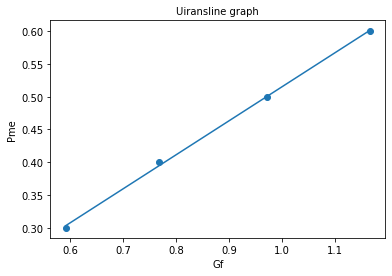

In [47]:
y = [0.3, 0.4, 0.5, 0.6]
x = [0.591, 0.768, 0.972, 1.167]
func = np.poly1d(np.polyfit(x, y, 1))
y2 = func(x)
plt.plot(x, y2)
a, b = np.polyfit(x, y, 1)
print("katamuki=", a)
print("seppenn=", b)
plt.scatter(x, y)
plt.xlabel( 'Gf' )
plt.ylabel( 'Pme' )
plt.title("Uiransline graph", size=10)

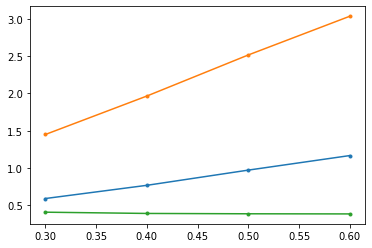

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
####################関数##################
#空気の密度を求める関数(kg/m^3)
def low_air(Ta):
    ans = 273*1.293*756/((273+Ta)*763)
    return ans
#粘性補正係数を求める関数
def nyu(Ta):
    ans = ((380+25.5)/400)*((293/(243+Ta))**1.5)
    return ans
###############変数宣言と初期化#####################
Hu = 28430 #低発熱量(kj/kg)
PI = 3.14159265359 #円周率
pmf =0.00228641642172201
Gth = 9.0
K20 = 0.01572
T0 = 25.5 #気温
####################################
x = [0.3, 0.4, 0.5, 0.6]
Gf=[0.591, 0.768, 0.972, 1.167]#燃料流量(kg/h)
W=[35.672, 48.02, 61.25, 73.794]#荷重N
N=[950.2, 956.8, 960.4, 961.6]#回転数rpm
Qc=[0.00135, 0.00255, 0.00305, 0.00455]#流量m^3/min
dT=[9.4, 10, 8.8, 8.2]
dp=[0.3118515, 0.312636, 0.312832135, 0.3118515]
Ta=[28, 30, 31, 32.6] #吸気温度(℃)
##########リスト初期化#################
T=[0]*4 #軸トルクのリスト(Nm)
L=[0]*4 #軸出力のリスト(kw)
Be=[0]*4 #燃費消費率のリスト(g/kwh)
qe=[0]*4 #正味熱効率
qm=[0]*4 #機械熱効率
qc=[0]*4 #冷却損失
qex=[0]*4 #排気損失
Ga=[0]*4 #吸入空気量
Ram=[0]*4 #平均空気過剰率
###############計算########################
for i in range(4):
    T[i]+=W[i]*0.4085
    L[i]+=(PI*T[i]*N[i])/30000
    Be[i]+=Gf[i]/L[i]
    qe[i]+=100*3600*L[i]/(Hu*Gf[i])
    qm[i]+=100*(x[i]/(x[i]+pmf))
    qc[i]+=100*(4186*60*Qc[i]*dT[i])/(Hu*Gf[i])
    Ga[i]+=3.6*low_air(Ta[i])*K20*nyu(Ta[i])*dp[i]
    Ram[i]+=Ga[i]/(Gf[i]*9.0)
    #qex[i]+=4.186*
#########################################
plt.plot(x, Gf, '.-' )
plt.plot(x, L, '.-' )
plt.plot(x, Be, '.-' )


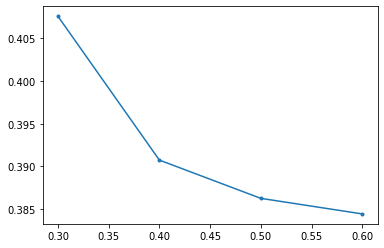

In [91]:
plt.plot(x, Be, '.-')#燃料消費率be


[31.067143572892363, 32.40622344971543, 32.78221538948875, 32.93752562451584]


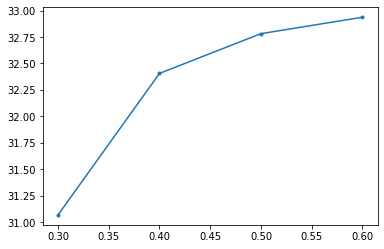

In [9]:
plt.plot(x, qe, '.-')#正味熱効率(%)
print(qe)

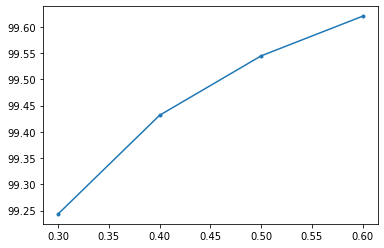

In [11]:
plt.plot(x, qm, '.-')#機械効率

[18.969144983403893, 29.33273610622582, 24.39438430105566, 28.244117378452646]


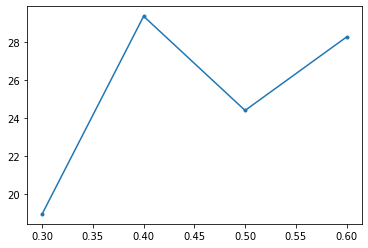

In [20]:
print(qc) #冷却損失
plt.plot(x, qc, '.-')

[0.0043938293425431416, 0.0033303848838184304, 0.002610050595227596, 0.0021370174664347096]


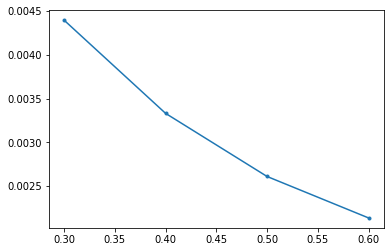

In [6]:
print(Ram)
plt.plot(x, Ram, '.-')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi, cos, sin
#体積を計算する関数
def solve_v(deg):
    rad = pi*deg/180
    v1 = pi*((0.148)**2)*0.066
    v2 = (1-cos(rad) + (0.066/(4*0.148))*(1-cos(2*rad)))
    v3 = (638*1e-6)/16.7
    return v1*v2+v3

